In [1]:
# Importing basic packages
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
#os.get.cwd()

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv', sep = '\t', quoting = 3)
df
# quoting

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [3]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [4]:
df.shape

(1000, 2)

In [5]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [6]:
# check imbalance dataset
df.Liked.value_counts()

0    500
1    500
Name: Liked, dtype: int64

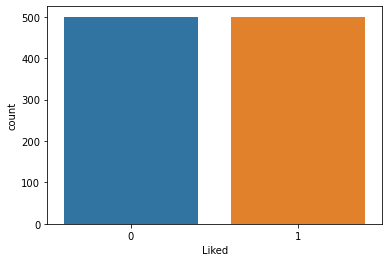

In [7]:
# vizulaization of target classes
sns.countplot(x = 'Liked', data = df)
plt.show()

In [14]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = " ".join(review)
    corpus.append(review)
print(corpus)
    
    

['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place worth time let alon vega', 'like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could happier', 'seem like go

# Bag of Words

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
cv = CountVectorizer(max_features=1600)
x = cv.fit_transform(corpus).toarray()
x.shape

(1000, 1565)

In [65]:
x[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
y = df['Liked'].values
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

# Split the data into train and test

In [18]:
 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 101, test_size = .30)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(700, 1565)
(300, 1565)
(300,)
(700,)


# Naive Bayes Theorem


In [19]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [20]:
y_predict_train = classifier.predict(x_train)
y_predict_test = classifier.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [22]:
print(confusion_matrix(y_train, y_predict_train))

[[304  46]
 [  0 350]]


In [23]:
print(confusion_matrix(y_test, y_predict_test))

[[ 76  74]
 [ 26 124]]


In [78]:
print(classification_report(y_train, y_predict_train))
print('#####'*20)
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       350
           1       0.88      1.00      0.94       350

    accuracy                           0.93       700
   macro avg       0.94      0.93      0.93       700
weighted avg       0.94      0.93      0.93       700

####################################################################################################
              precision    recall  f1-score   support

           0       0.75      0.51      0.60       150
           1       0.63      0.83      0.71       150

    accuracy                           0.67       300
   macro avg       0.69      0.67      0.66       300
weighted avg       0.69      0.67      0.66       300



In [24]:
print(accuracy_score(y_train, y_predict_train))
print('#####'*20)
print(accuracy_score(y_test, y_predict_test))

0.9342857142857143
####################################################################################################
0.6666666666666666


# Using Lemmatization

In [24]:
# Tokenize sentences
# Remove capital letters
# Remove stopwords
# Remove non-alphanumeric characters
# Lemmatize the tokens
def clean(text):
    wn = WordNetLemmatizer()
    stopword = stopwords.words('english')
    tokens = word_tokenize(text)
    lower = [word.lower() for word in tokens]
    no_stopwords = [word for word in lower if word not in stopword]
    no_alpha = [word for word in no_stopwords if word.isalpha()]
    lemm_text = [wn.lemmatize(word) for word in no_alpha]
    clean_text = lemm_text
    return clean_text

In [25]:
df['clean']=df['Review'].map(clean)

In [26]:
df['clean']

0                                    [wow, loved, place]
1                                          [crust, good]
2                                [tasty, texture, nasty]
3      [stopped, late, may, bank, holiday, rick, stev...
4                        [selection, menu, great, price]
                             ...                        
995              [think, food, flavor, texture, lacking]
996                          [appetite, instantly, gone]
997                [overall, impressed, would, go, back]
998    [whole, experience, underwhelming, think, go, ...
999    [wasted, enough, life, poured, salt, wound, dr...
Name: clean, Length: 1000, dtype: object

In [27]:
df['clean_text']=df['clean'].apply(lambda x: " ".join([str(word) for word in x]))

In [28]:
df['clean_text']

0                                        wow loved place
1                                             crust good
2                                    tasty texture nasty
3      stopped late may bank holiday rick steve recom...
4                             selection menu great price
                             ...                        
995                    think food flavor texture lacking
996                              appetite instantly gone
997                      overall impressed would go back
998    whole experience underwhelming think go ninja ...
999    wasted enough life poured salt wound drawing t...
Name: clean_text, Length: 1000, dtype: object

# Generating Word Cloud

In [29]:
positive_words=" ".join(df[df.Liked==1]['clean_text'].values)
negative_words=" ".join(df[df.Liked==0]['clean_text'].values)

In [30]:
from wordcloud import WordCloud

In [31]:
def generate_wordcloud(words,sentiment):
    plt.figure(figsize=(16,13))
    wc = WordCloud(background_color="white", max_words=75, max_font_size=50)
    wc.generate(words)
    plt.title("Most common {} words".format(sentiment), fontsize=40)
    plt.imshow(wc.recolor(colormap='Dark2', random_state=17), alpha=0.98)
    plt.axis('off')

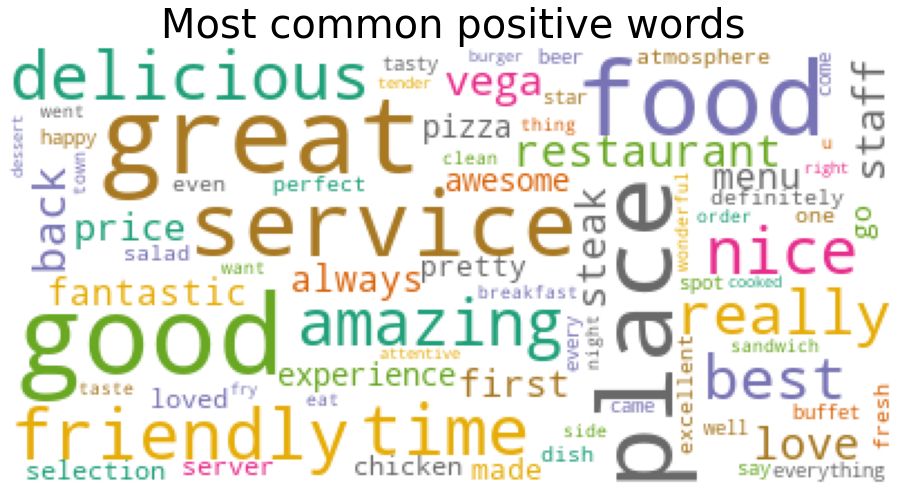

In [32]:
generate_wordcloud(positive_words,"positive")

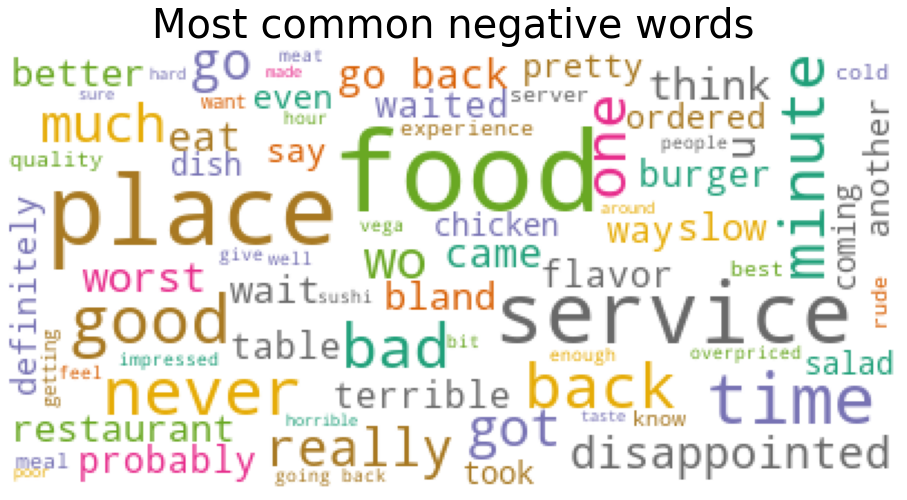

In [33]:
generate_wordcloud(negative_words,"negative")

# TFID 

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

df_x=df['Review']
df_y=df['Liked'] 
tf = TfidfVectorizer()   
df_tf = tf.fit_transform(df_x)  
a=df_tf.toarray()  
words = tf.get_feature_names() 

In [26]:
x_tfidf_df = pd.DataFrame(a)
x_tfidf_df.columns = words
x_tfidf_df

,00,10,100,11,12,15,17,1979,20,2007,...,yelpers,yet,you,your,yourself,yucky,yukon,yum,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Split the data into train and test 
from sklearn.model_selection import train_test_split
x_train_tf, x_test_tf, y_train_tf, y_test_tf = train_test_split(x_tfidf_df, df['Liked'], random_state = 101, test_size = .30)

In [31]:
x_train_tf

,00,10,100,11,12,15,17,1979,20,2007,...,yelpers,yet,you,your,yourself,yucky,yukon,yum,yummy,zero
290,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.275255,0.0,0.0,0.0,0.0,0.0,0.0,0.0
486,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
683,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
838,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337,0.0,0.0,0.0,0.0,0.0,0.0,0.363793,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
523,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
print(x_train_tf.shape)
print(x_test_tf.shape)
print(y_test_tf.shape)
print(y_train_tf.shape)

(700, 2035)
(300, 2035)
(300,)
(700,)


# Build Classification Model

In [33]:
from sklearn.naive_bayes import GaussianNB
classifier_1 = GaussianNB()
classifier_1.fit(x_train_tf,y_train_tf)

GaussianNB()

In [35]:
y_test_tf_pred = classifier_1.predict(x_test_tf)

In [36]:
y_train_tf_pred = classifier_1.predict(x_train_tf)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [37]:
print(classification_report(y_train_tf, y_train_tf_pred))
print('+++++'*20)
print(classification_report(y_test_tf, y_test_tf_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       350
           1       0.93      1.00      0.96       350

    accuracy                           0.96       700
   macro avg       0.97      0.96      0.96       700
weighted avg       0.97      0.96      0.96       700

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.73      0.57      0.64       150
           1       0.64      0.79      0.71       150

    accuracy                           0.68       300
   macro avg       0.69      0.68      0.67       300
weighted avg       0.69      0.68      0.67       300



In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
accuracy = cross_val_score(classifier,x_test_tf, y_test_tf,cv=10)

In [40]:
accuracy 

array([0.6       , 0.53333333, 0.73333333, 0.6       , 0.66666667,
       0.63333333, 0.56666667, 0.63333333, 0.53333333, 0.63333333])

# XG Boost Classifier

In [42]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train_tf, y_train_tf)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [43]:
y_pred_xgb_train = xgb_classifier.predict(x_train_tf)
y_pred_xgb_test = xgb_classifier.predict(x_test_tf)

In [44]:
print(classification_report(y_train_tf, y_pred_xgb_train))

print("#########"*50)

print(classification_report(y_test_tf, y_pred_xgb_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       350
           1       1.00      0.98      0.99       350

    accuracy                           0.99       700
   macro avg       0.99      0.99      0.99       700
weighted avg       0.99      0.99      0.99       700

##################################################################################################################################################################################################################################################################################################################################################################################################################################################################
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       150
           1       0.72      0.73      0.72       150

    accuracy                           0.72       300
   m

In [45]:
accuracy = cross_val_score(xgb_classifier,x_test_tf, y_test_tf,cv=10)

In [46]:
print(accuracy)


[0.6        0.7        0.66666667 0.7        0.5        0.66666667
 0.56666667 0.63333333 0.8        0.66666667]


# Conclusion: XGBoost shows better performance